# DecisionTreeClassifier

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
# DecisionTree Classifier 생성
dt_clt = DecisionTreeClassifier(random_state = 156)

In [3]:
# 붗꽃 데이터를 로딩하고, 학습과 테스트 세트로 분리
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size = 0.2, 
                                                    random_state = 11)

In [4]:
# DecisionTreeClassifire 학습
dt_clt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

사이킷런의 트리 모듈은 Graphviz를 이용하기 위해 export_graphviz() 함수 제공.  
export_graphviz()는 Graphviz가 읽어 들여서 그래프 형태로 시각화할 수 있는 출력 파일을 생성한다.  
export_graphviz()에 인자로 학습이 완료된 estimator, output 파일 명, 결정 클래스의 명칭, 피처의 명칭을 입력해주면 된다.

In [5]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file 로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clt, out_file = 'tree.dot', class_names = iris_data.target_names, 
                feature_names = iris_data.feature_names, impurity = True, filled = True)

위에서 생성된 tree.dot 파일을 Graphviz의 파이썬 래퍼 모듈을 호출해 결정 트리의 규칙을 시각적으로 표현할 수 있다.

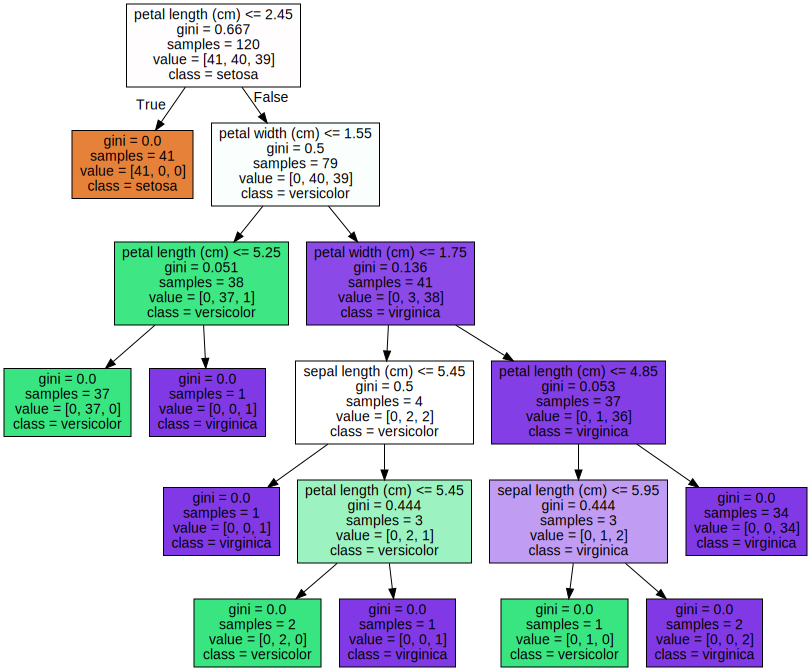

In [6]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# 분석 (디폴트 설정)

**리프노드** : 최종 클래스(레이블) 값이 결정되는 더 이상 자식 노드가 없는 노드.  
리프노드가 되려면 오직 하나의 클래스 값으로 최종 데이터가 구성되거나 리프 노드가 될 수 있는 하이퍼 파라미터 조건을 충족해야 한다.

- petal length(cm) <= 2.45 : 이러한 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건이다. 이 조건이 없으면 리프노드다.
- gini : value = [] 로 주어진 데이터 분포에서의 지니 계수
- samples : 현 규칙에 해당하는 데이터 건수
- value = [] : 클래스 값 기반의 데이터 건수.  
    붓꽃 데이터 세트는 클래스 값으로 0, 1, 2를 가지고 있으며, (0 : Setosa, 1 : Versicolor, 2 : Virginica) 품종을 가진다.  
    ex) Value = [41, 40, 39] => Setosa 41개, Versicolor 40개, Virginica 39개

1번 노드
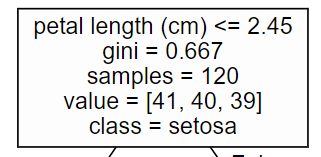
- samples = 120 개 => 전체 데이터가 120개라는 의미
- value = [41, 40, 39] => Setosa 41개, Versicolor 40개, Virginica 39개로 데이터 구성
- 샘플 120개가 value = [41, 40, 39] 분포도로 되어 있으므로 지니 계수는 0.667  
$1 - {(41 / 120)^2 + (40 / 120)^2 + (39 / 120)^2} = 0.66652777... = 0.667$
- petal length(cm) <= 2.45 규칙으로 자식 노드 생성
- class = setosa는 하위 노드를 가질 경우에 setosa의 개수가 41개로 제일 많다는 의미

2번 노드  
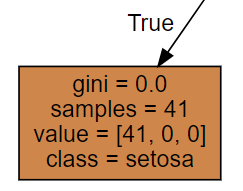
- 모든 데이터가 Setosa로 결정되므로 클래스가 결정된 리프 노드가 되고 더 이상 2번 노드에서 규칙을 만들 필요가 없다.  
- 2번 노드는 petal length(cm) <= 2.45 가 True인 규칙으로 생성되는 리프 노드 
- 41개의 샘플 데이터 모두 Setosa이므로 예측 클래스는 Setosa로 결정, 지니 계수는 0 이다.

3번 노드
- petal length(cm) <= 2.45 가 False인 규칙 노드
- 79개의 샘플 데이터 중 Vesicolor 40개, Virginica 39개로 지니 계수는 0.5로 높으므로 다음 자식 브랜치 노드로 분기할 규칙 필요.
- petal width (cm) <= 1.55 규칙으로 자식 노드 생성

4번 노드
- 38개의 샘플 데이터 중 Versicolor 39개, Virginica가 1개로 대부분이 versicolor임.
- 지니 계수는 0.051로 매우 낮으나 여전히 Versicolor와 Virginica가 혼재되어 있으므로  
petal length(cm) <= 5.25라는 새로운 규칙으로 다시 자식 노드 생성

5번 노드
- 41개의 샘플 데이터 중 Versicolor 3개, Virginica가 38개로 대부분이 virginica임.
- 지니 계수는 0.136으로 매우 낮으나 여전히 Versicolor와 Virginica가 혼재되어 있으므로  
petal width(cm) <= 1.75 라는 새로운 규칙으로 다시 자식 노드 생성

각 노드의 색깔은 붓꽃 데이터의 레이블 값을 의미한다.  
- 주황색 => 0 : Setosa
- 초록색 => 1 : Versicolor
- 보라색 => 2 : Virginica  

색깔이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다는 뜻이다.

결정트리는 규칙 생성 로직을 미리 제어하지 않으면 완벽하게 클래스 값을 구별해내기 위해 트리 노드를 계속해서 만들어간다.
이로 인해 결국 매우 복잡한 규칙 트리가 만들어져 모델이 쉽게 과적합될 수 있다.
결정 트리는 이러한 이유로 과적합이 상당히 높은 ML 알고리즘이다.
이 때문에 결정트리 알고리즘을 제어하는 대부분 하이퍼 파라미터는 복잡한 트리가 생성되는 것을 막기 위한 용도이다.

# 결정트리의 하이퍼 파라미터 변경에 따른 트리 변화

## 1. max_depth
결정 트리의 최대 트리 깊이를 제어한다.

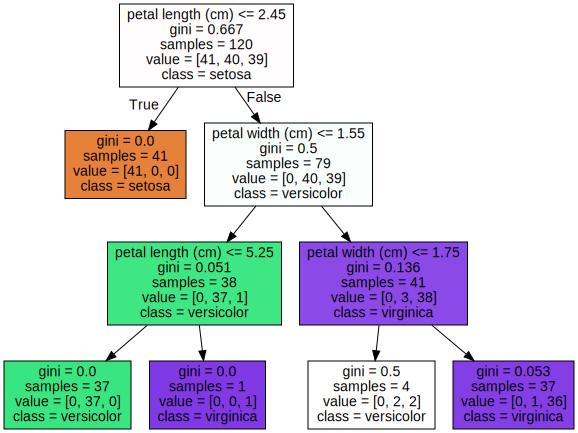

In [7]:
# DecisionTree Classifier 생성
dt_clt_t2 = DecisionTreeClassifier(max_depth = 3, random_state = 156)

# DecisionTreeClassifire 학습
dt_clt_t2.fit(X_train, y_train)

# export_graphviz()의 호출 결과로 out_file 로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clt_t2, out_file = 'tree_t2.dot', class_names = iris_data.target_names, 
                feature_names = iris_data.feature_names, impurity = True, filled = True)

# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 시각화
with open("tree_t2.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## 2. min_samples_split
자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수

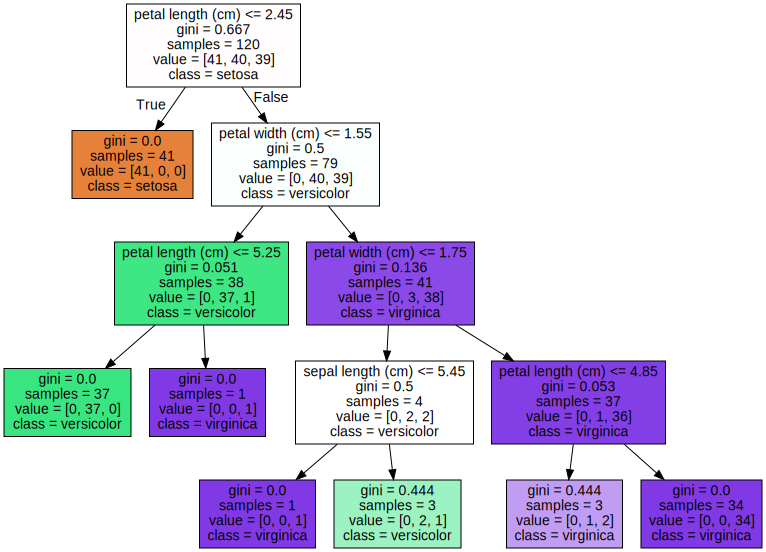

In [8]:
# DecisionTree Classifier 생성
dt_clt_t3 = DecisionTreeClassifier(min_samples_split = 4, random_state = 156)

# DecisionTreeClassifire 학습
dt_clt_t3.fit(X_train, y_train)

# export_graphviz()의 호출 결과로 out_file 로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clt_t3, out_file = 'tree_t3.dot', class_names = iris_data.target_names, 
                feature_names = iris_data.feature_names, impurity = True, filled = True)

# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 시각화
with open("tree_t3.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

아래 두 노드(11번, 12번)를 보면 샘플이 3개인데, 이 노드 안에 [0, 2, 1]과 [0, 1, 2]로 서로 상이한 클래스값이 있어도   
더 이상 분할하지 않고 리프 노드가 되었다.   
min_samples_splits = 4 :: 자식노드로 분할 하려면 최소한 샘플 개수가 4개는 필요한데, 3개 밖에 없으므로 자식 규칙 노드를 위한 분할을 하지 않는다. 

## 3. min_samples_leaf
리프 노드가 될 수 있는 샘플 데이터 건수의 최솟값 지정

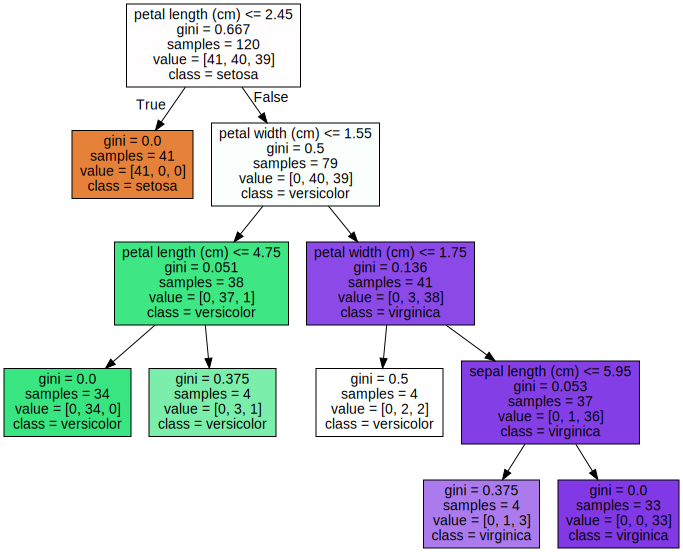

In [9]:
# DecisionTree Classifier 생성
dt_clt_t4 = DecisionTreeClassifier(min_samples_leaf = 4, random_state = 156)

# DecisionTreeClassifire 학습
dt_clt_t4.fit(X_train, y_train)

# export_graphviz()의 호출 결과로 out_file 로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clt_t4, out_file = 'tree_t4.dot', class_names = iris_data.target_names, 
                feature_names = iris_data.feature_names, impurity = True, filled = True)

# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 시각화
with open("tree_t4.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

샘플이 4 이하면 리프 노드가 되기 때문에 지니 계수값이 크더라도 샘플이 4인 조건으로 규칙 변경을 선호하게 되어,  
자연스럽게 브랜치 노드가 줄어들고 결정 트리가 더 간결하게 만들어진다.  

# 결정트리 알고리즘에서 중요도 추출

결정트리는 균일도에 기반해 어떠한 속성을 규칙 조건으로 선택하느냐가 중요한 요건임!!

중요한 몇 개의 피처가 명확한 규칙 트리를 만드는 데 크게 기여하며, 모델을 좀 더 간결하고 이상치에 강한 모델로 만들 수 있다.  
사이킷런은 결정 트리 알고리즘이 학습을 통해 규칙을 정하는 데 있어   
피처의 중요한 역할 지표를 DecisionTreeClassifier 객체의 feature_importances_ 속성으로 제공한다.

feature_importances_ 는 ndarray 형태로 값 반환하며 피처 순서대로 값이 할당됨.
ex. [0.01667014 0.02500521 0.03200643 0.92631822] => 첫 번쨰 피처의 중요도가 0.01667014, 두 번째 피처가 0.02500521과 같이 매치

Feature importances : 
[0.025 0.    0.555 0.42 ]

sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

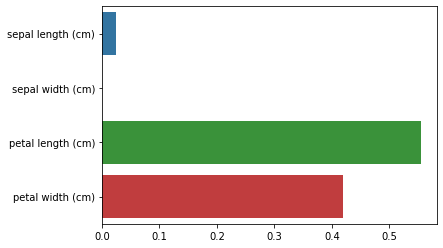

In [10]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances : \n{0}\n".format(np.round(dt_clt.feature_importances_, 3))) # 소수점 이하 세번째 자리까지 출력 

names = iris_data.feature_names
importances = dt_clt.feature_importances_

# feature별 importance 매핑
for name, value in zip(names, importances):
    print('{0} : {1:.3f}'.format(name, value))
    
# feature importance 를 column 별로 시각화하기
sns.barplot(x = importances, y = names)

여러 피처들 중 petal_length 가 가장 피처 중요도가 높음.

# 결정 트리 과적합(Overfitting)
결정트리가 어떻게 학습 데이터를 분할해 예측을 수행하는지, 이로 인한 과적합 문제를 시각화해 알아보자!

1. 분류를 위한 데이터 세트를 임의로 만들기  
사이킷런은 분류를 위한 테스트용 데이터를 쉽게 만들 수 있도록 make_classification() 함수를 제공한다.
2. 이 함수를 이용해 2개의 피처가 3가지 유형의 클래스 값을 가지는 데이터 세트를 만든다.
3. 이를 그래프 형태로 시각화한다.

In [11]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

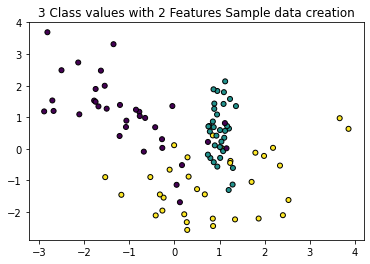

In [12]:
plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features = 2, n_redundant = 0, n_informative = 2,
                                          n_classes = 3, n_clusters_per_class = 1, random_state = 0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:, 1], marker = 'o', c = y_labels, s = 25, edgecolor = 'k')

X_features과 y_labels 데이터 세트를 기반으로 결정 트리를 학습하겠다.  

첫 번째 학습 시에는 결정 트리 생성에 별다른 제약이 없도록 결정 트리의 하이퍼 파라미터를 디폴트로 한 뒤,   
결정 트리 모델이 어떠한 결정 기준을 가지고 분할하면서 데이터를 분류하는지 확인할 것이다.

visualize_boundary() 함수는 머신러닝 모델이 클래스 값을 예측하는 결정기준을 색상과 경계로 나타내   
모델이 어떻게 데이터 세트를 예측 부류하는지 잘 이해할 수 있게 해준다.

In [13]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

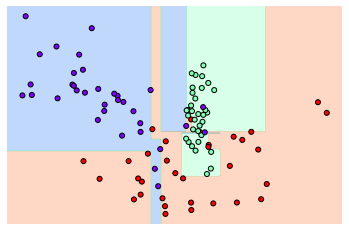

In [14]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

일부 이상치 데이터까지 분류하기 위해 분할이 자주 일어나서 결정 기준 경계가 매우 많아졌다.  

결정 트리의 기본 하이퍼 파라미터로 설정하면,  
리프 노드 안에 데이터가 모두 균일하거나 하나만 존재해야 하는 엄격한 분할 기준으로 인해 결정 기준 경계가 많아지고 복잡해졌다.

복잡한 모델은 학습 데이터 세트의 특성과 약간만 다른 형태의 데이터 세트를 예측하면 예측 정확도가 떨어진다.

하이퍼 파라미터를 조정하여 결정 기준 경계의 변화를 확인해보자.

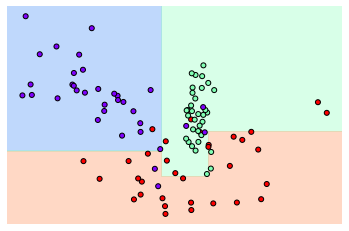

In [16]:
# min_samples_leaf = 6 으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf = 6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

이상치에 크게 반응하지 않으면서 좀 더 일반화된 분류 규칙에 따라 분류됐음을 알 수 있다.

다른 다양한 테스트 데이터를 생성하여 결정 트리 모델을 이용하여 예측하면  
첫 번째 모델보다는 min_samples_leaf = 6 으로 트리 생성 조건을 제약한 모델이 더 뛰어날 가능성이 높다.